In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").config("spark.execute.memory", "1gb").appName("Analyzing Bosten and chicago Crime data").getOrCreate()

In [2]:
#import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import  *
from pyspark.sql import SQLContext
#Zonder schema wordt de namen van de column onduidelijk zoals col1,col2 ....
chicago_crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])


boston_crimes_schema = StructType([StructField("INCIDENT_NUMBER", StringType(), True),
                            StructField("OFFENSE_CODE", StringType(), True),
                            StructField("OFFENSE_CODE_GROUP", StringType(), True),
                            StructField("OFFENSE_DESCRIPTION", StringType(), True),
                            StructField("DISTRICT", StringType(), True),
                            StructField("REPORTING_AREA", StringType(), True),
                            StructField("SHOOTING", StringType(), True),
                            StructField("OCCURRED_ON_DATE", TimestampType(), True),
                            StructField("YEAR", IntegerType(), True),
                            StructField("MONTH", IntegerType(), True),
                            StructField("DAY_OF_WEEK", StringType(), True),
                            StructField("HOUR", IntegerType(), True),
                            StructField("UCR_PART",StringType(), True),
                            StructField("STREET", StringType(), True),
                            StructField("Lat", StringType(), True),
                            StructField("Long", StringType(), True),
                            StructField("Location", StringType(), True)])


schema_Income = StructType([StructField("ID Year", StringType(), True),
                            StructField("Year", StringType(), True),
                            StructField("Income", IntegerType(), True),
                            StructField("Household Income by Race Moe", StringType(), True),
                            StructField("Geography", StringType(), True),
                            StructField("ID Geography", StringType(), True),
                            StructField("Slug", StringType(), True)])


## old schema Crime in Bosten 
crimes_old_schema = StructType([StructField("COMPNOS", StringType(), True),
                            StructField("NatureCode", StringType(), True),
                            StructField("INCIDENT_TYPE_DESCRIPTION", StringType(), True),
                            StructField("MAIN_CRIMECODE", StringType(), True),
                            StructField("REPTDISTRICT", StringType(), True),
                            StructField("REPORTINGAREA", StringType(), True),
                            StructField("FROMDATE", StringType(), True),
                            StructField("WEAPONTYPE", StringType(), True),
                            StructField("Shooting", StringType(), True),
                            StructField("DOMESTIC", StringType(), True),
                            StructField("SHIFT", StringType(), True),
                            StructField("Year", StringType(), True),
                            StructField("Month", IntegerType(), True),
                            StructField("DAY_WEEK", StringType(), True),
                            StructField("UCRPART", StringType(), True),
                            StructField("X", StringType(), True),
                            StructField("Y", StringType(), True),
                            StructField("STREETNAME", StringType(), True),
                            StructField("XSTREETNAME", StringType(), True),
                            StructField("Location", StringType(), True)
])


## Bosten Icom schema
income_schema = StructType([StructField("ID", IntegerType(), True),
                           StructField("Year", IntegerType(), True),
                           StructField("Income", IntegerType(), True),
                           StructField("IncomeMoe", StringType(), True),
                           StructField("Geo", StringType(), True),
                           StructField("GeoId", StringType(), True),
                           StructField("SlugGeo", StringType(), True)])
 

bostoncrimes = spark.read.csv("./data/BostonData.csv", header = True, schema = boston_crimes_schema)





chicagocrimes = spark.read.csv("./data/city_of_chicago_crimes_2001_to_present.csv",header = True,schema = chicago_crimes_schema)


#spark = SparkSession.builder.appName("Analyzing Bosten and chicago Income data").getOrCreate()

chicagoIncome = spark.read.csv("./data/ChicagoHouseholdIncome.csv",header = True,schema = schema_Income)


#spark = SparkSession.builder.appName("Analyzing Bosten and Boston Income data").getOrCreate()

bostonIncome = spark.read.csv("./data/BostonHouseholdIncome.csv",header = True,schema = schema_Income)

#Income in Bosten 
crimes_old = spark.read.csv("./data/BostonCrimesOld.csv", header = True, schema = crimes_old_schema)
 

sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [3]:
bostoncrimes.select("INCIDENT_NUMBER").show()

+---------------+
|INCIDENT_NUMBER|
+---------------+
|      120420285|
|      120419202|
|      120419213|
|      120419223|
|      120419236|
|      120419239|
|      120419257|
|      120419424|
|      120419255|
|      120419274|
|      120419278|
|      120419280|
|      120449819|
|      120419475|
|      120419370|
|      120419367|
|      120419366|
|      120419376|
|      120419382|
|      120419328|
+---------------+
only showing top 20 rows



In [4]:
chicagocrimes.count()

6988852

In [5]:
chicagocrimes.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

In [6]:
bostoncrimes.count()

694876

In [7]:
bostoncrimes.columns

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [8]:
chicagocrimes.select('Date').show(10,truncate=False)

+----------------------+
|Date                  |
+----------------------+
|10/10/2019 11:39:00 PM|
|10/10/2019 11:38:00 PM|
|10/10/2019 11:34:00 PM|
|10/10/2019 11:31:00 PM|
|10/10/2019 11:30:00 PM|
|10/10/2019 11:30:00 PM|
|10/10/2019 11:24:00 PM|
|10/10/2019 11:23:00 PM|
|10/10/2019 11:20:00 PM|
|10/10/2019 11:15:00 PM|
+----------------------+
only showing top 10 rows



In [9]:
from datetime import datetime
from pyspark.sql.functions import col,udf
myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df =chicagocrimes.withColumn('Date_time',myfunc(col('Date'))).drop('Date')
df.select(df["Date_time"]).show(5)

dg =bostoncrimes.withColumn('OCCURRED_ON_DATE',myfunc(col('OCCURRED_ON_DATE'))).drop('OCCURRED_ON_DATE')
#dg.select(df["OCCURRED_ON_DATE"]).show(5)

+-------------------+
|          Date_time|
+-------------------+
|2019-10-10 23:39:00|
|2019-10-10 23:38:00|
|2019-10-10 23:34:00|
|2019-10-10 23:31:00|
|2019-10-10 23:30:00|
+-------------------+
only showing top 5 rows



In [10]:
#data = df.groupBy('Year').count().show()
chicago_data =df.groupBy('Year').count().sort('Year').collect()
chicago_count = [item[1] for item in chicago_data]
chicago_year = [item[0] for item in chicago_data]
chicago_data

[Row(Year=2001, count=485760),
 Row(Year=2002, count=486758),
 Row(Year=2003, count=475949),
 Row(Year=2004, count=469390),
 Row(Year=2005, count=453717),
 Row(Year=2006, count=448120),
 Row(Year=2007, count=437027),
 Row(Year=2008, count=427071),
 Row(Year=2009, count=392724),
 Row(Year=2010, count=370354),
 Row(Year=2011, count=351819),
 Row(Year=2012, count=336051),
 Row(Year=2013, count=307178),
 Row(Year=2014, count=275395),
 Row(Year=2015, count=264247),
 Row(Year=2016, count=269203),
 Row(Year=2017, count=268371),
 Row(Year=2018, count=267527),
 Row(Year=2019, count=202191)]

In [11]:
#data = df.groupBy('Year').count().show()
boston_data =dg.groupBy('Year').count().sort('Year').collect()
boston_count = [item[1] for item in boston_data]
boston_year = [item[0] for item in boston_data]
boston_data

[Row(Year=2012, count=43186),
 Row(Year=2013, count=87052),
 Row(Year=2014, count=88058),
 Row(Year=2015, count=103357),
 Row(Year=2016, count=99430),
 Row(Year=2017, count=101338),
 Row(Year=2018, count=98888),
 Row(Year=2019, count=73567)]

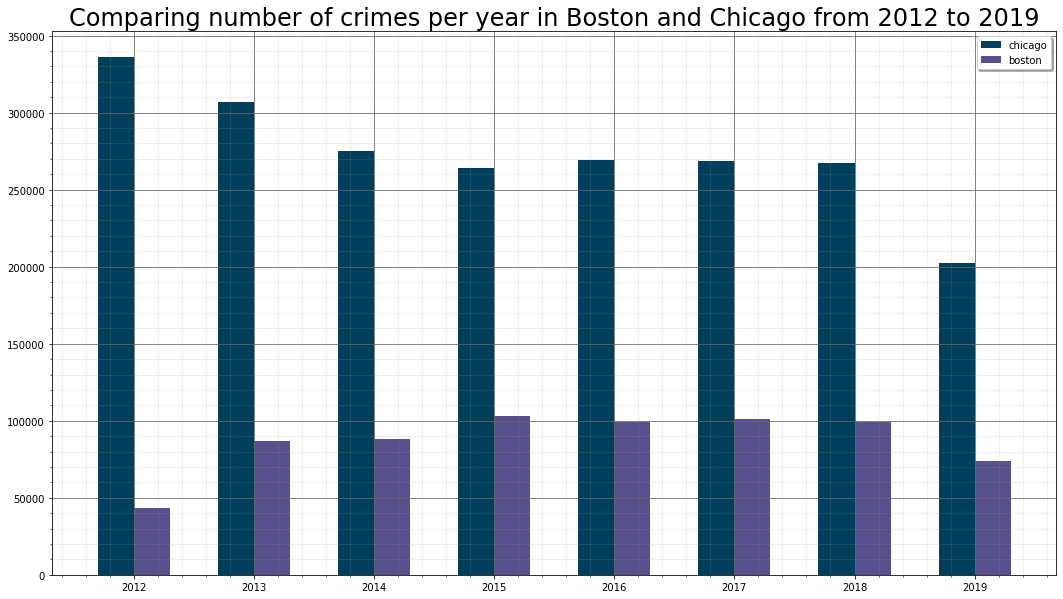

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y_axis = [i for i in boston_count] 
x_axis= [i for i in chicago_count]
#z_axis = [i for i in boston_count]

fig = plt.figure(figsize=(18,10))
plt.title('Comparing number of crimes per year in Boston and Chicago from 2012 to 2019', fontsize=24)
 
data = [x_axis[11:],y_axis]


years = ['2012','2013','2014','2015','2016','2017','2018','2019']
X = np.arange(len(years))
plt.bar(X - 0.15, data[0], color = '#003f5c', width = 0.3,label='chicago')
plt.bar(X + 0.15, data[1], color = '#58508d', width = 0.3,label='boston')
ax = plt.gca()
ax.legend(shadow=True)
plt.xticks(X,(years))

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

In [13]:
bostoncrimes.registerTempTable("table")
crimes_old.registerTempTable("test")

# Join them together
all_boston_crimes = sqlContext.sql("""
               SELECT
                   YEAR,
                   MONTH,
                   STREET,
                   DISTRICT,
                   OFFENSE_DESCRIPTION,
                   Location
                FROM table
                UNION
                SELECT
                    YEAR,
                    MONTH,
                    STREETNAME,
                    REPTDISTRICT,
                    INCIDENT_TYPE_DESCRIPTION,
                    Location
                FROM test""")

In [14]:
## get only the boston house hold income
bostonIncome.registerTempTable("income")

BostonIncome = sqlContext.sql("SELECT * FROM income WHERE Slug LIKE 'boston%'").groupBy("YEAR").sum("Income").orderBy("YEAR")

In [15]:
yearCount = bostoncrimes.groupBy("YEAR").count().orderBy("YEAR")#.groupBy("YEAR").count().orderBy("YEAR").show()

In [16]:
yearCount.show()

+----+------+
|YEAR| count|
+----+------+
|2012| 43186|
|2013| 87052|
|2014| 88058|
|2015|103357|
|2016| 99430|
|2017|101338|
|2018| 98888|
|2019| 73567|
+----+------+



In [17]:
test = yearCount.filter('YEAR >= 2013 AND YEAR <= 2018').limit(6).collect()
test

[Row(YEAR=2013, count=87052),
 Row(YEAR=2014, count=88058),
 Row(YEAR=2015, count=103357),
 Row(YEAR=2016, count=99430),
 Row(YEAR=2017, count=101338),
 Row(YEAR=2018, count=98888)]

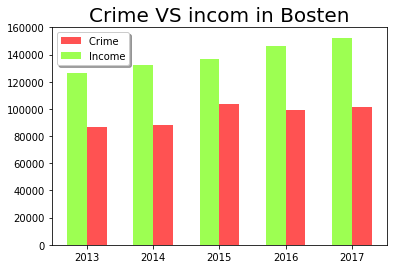

In [18]:
import numpy as np

x_axies = [i[0] for i in BostonIncome.select("sum(Income)").limit(5).collect()]
y_axies = [i[1] for i in yearCount.filter('YEAR >= 2013 AND YEAR <= 2018').orderBy("YEAR").limit(5).collect()]

data = [x_axies, y_axies]
years = ['2013','2014','2015','2016','2017']
X = np.arange(len(years))

plt.title('Crime VS incom in Bosten', fontsize=20)
plt.bar(X + 0.15, data[1], color = '#ff5252', width = 0.30, label = 'Crime ')
plt.bar(X - 0.15, data[0], color = '#9dff52', width = 0.30, label = 'Income')

ax = plt.gca()
ax.legend(shadow=True)
plt.xticks(X,(years))
plt.show()


In [19]:
#chigago Icome VS Crime 
chicagoIncome.registerTempTable('chicagoIncome')

chicagoIncomeData = sqlContext.sql("Select * From chicagoIncome where Slug Like 'chicago%'").groupBy("Year").sum("income").orderBy('Year')
chicagoIncomeData.show()

+----+-----------+
|Year|sum(income)|
+----+-----------+
|2013|     107663|
|2014|     110332|
|2015|     113855|
|2016|     119026|
|2017|     123698|
+----+-----------+



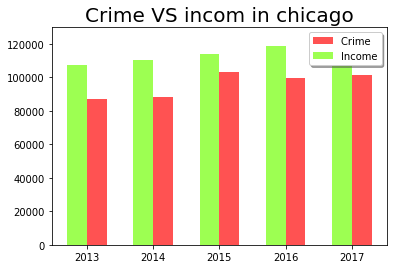

In [20]:
import numpy as np 
x_axies = [i[0] for i in chicagoIncomeData.select("sum(Income)").limit(5).collect()]
data = [x_axies, y_axies]

X = np.arange(len(years))

plt.title('Crime VS incom in chicago', fontsize=20)
plt.bar(X + 0.15, data[1], color = '#ff5252', width = 0.30, label = 'Crime ')
plt.bar(X - 0.15, data[0], color = '#9dff52', width = 0.30, label = 'Income')

ax = plt.gca()
ax.legend(shadow=True)
plt.xticks(X,(years))
plt.show()

In [21]:
#data = df.groupBy('Year').count().show()
boston_data =dg.groupBy('MONTH').count().sort('MONTH').collect()
boston_month_count = [item[1] for item in boston_data]
boston_month = [item[0] for item in boston_data]
boston_data

[Row(MONTH=1, count=52246),
 Row(MONTH=2, count=47156),
 Row(MONTH=3, count=53388),
 Row(MONTH=4, count=52797),
 Row(MONTH=5, count=58392),
 Row(MONTH=6, count=61425),
 Row(MONTH=7, count=72966),
 Row(MONTH=8, count=70257),
 Row(MONTH=9, count=65730),
 Row(MONTH=10, count=57122),
 Row(MONTH=11, count=51839),
 Row(MONTH=12, count=51558)]

In [22]:
from pyspark.sql.functions import month
chicago_monthdf = df.withColumn("Month",month('Date_time'))
chicago_month_count = chicago_monthdf.select("Month").where(chicagocrimes['Year'] >= 2015).groupBy("Month").count()
chicago_month_count = chicago_month_count.collect()
chicago_month_count

[Row(Month=12, count=84413),
 Row(Month=1, count=103409),
 Row(Month=6, count=118411),
 Row(Month=3, count=105575),
 Row(Month=5, count=118617),
 Row(Month=9, count=114318),
 Row(Month=4, count=106333),
 Row(Month=8, count=123541),
 Row(Month=7, count=123518),
 Row(Month=10, count=99216),
 Row(Month=11, count=84325),
 Row(Month=2, count=89863)]

In [23]:
chicago_month_count.sort()
chicago_months = [item[0] for item in chicago_month_count]
chicago_month_counts = [item[1] for item in chicago_month_count]
chicago_month_count

[Row(Month=1, count=103409),
 Row(Month=2, count=89863),
 Row(Month=3, count=105575),
 Row(Month=4, count=106333),
 Row(Month=5, count=118617),
 Row(Month=6, count=118411),
 Row(Month=7, count=123518),
 Row(Month=8, count=123541),
 Row(Month=9, count=114318),
 Row(Month=10, count=99216),
 Row(Month=11, count=84325),
 Row(Month=12, count=84413)]

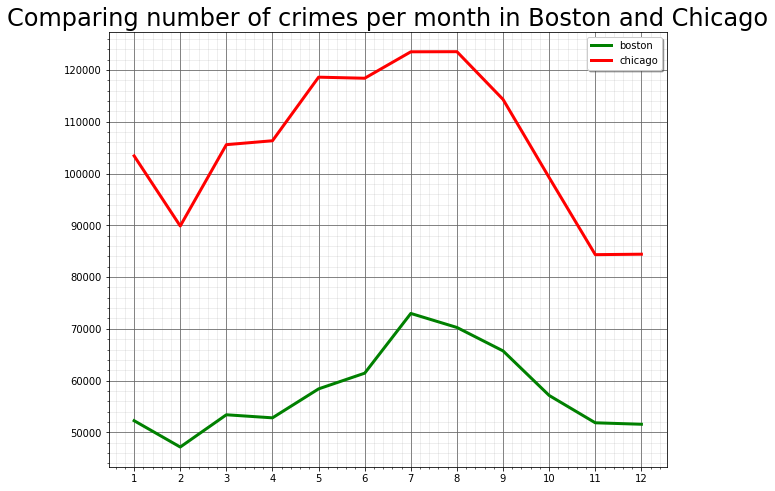

In [24]:
x_axis = [i for i in boston_month_count] 
y_axis= [i for i in chicago_month_counts]
#z_axis = [i for i in boston_count]

fig = plt.figure(figsize=(10,8))
plt.title('Comparing number of crimes per month in Boston and Chicago', fontsize=24)
#print(x_axis)
#print(y_axis)
#print(y_axis[11:])
data = [x_axis,y_axis]

 
#Month = ['1','2','3','4','5','6','7','8','9','10','11','12']
ax.set_xlim(1, 12)
X = np.arange(1,13,1)
plt.plot(X + 0.00, data[0], color = 'green',linewidth = 3, label='boston')
plt.plot(X + 0.00, data[1], color = 'red',linewidth = 3, label='chicago')
ax = plt.gca()
ax.legend(shadow=True)

plt.xticks(X)
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

In [25]:
#x_axis = [i for i in boston_month_count] 
#y_axis= [i for i in chicago_month_counts]

In [26]:
crime_location  = chicagocrimes.groupBy("LocationDescription").count().sort('count', ascending  = False).limit(20).collect()
crime_location

[Row(LocationDescription='STREET', count=1823012),
 Row(LocationDescription='RESIDENCE', count=1183071),
 Row(LocationDescription='APARTMENT', count=729645),
 Row(LocationDescription='SIDEWALK', count=684130),
 Row(LocationDescription='OTHER', count=266486),
 Row(LocationDescription='PARKING LOT/GARAGE(NON.RESID.)', count=200625),
 Row(LocationDescription='ALLEY', count=155557),
 Row(LocationDescription='SCHOOL, PUBLIC, BUILDING', count=145233),
 Row(LocationDescription='RESIDENCE-GARAGE', count=134663),
 Row(LocationDescription='SMALL RETAIL STORE', count=125572),
 Row(LocationDescription='RESIDENCE PORCH/HALLWAY', count=122356),
 Row(LocationDescription='VEHICLE NON-COMMERCIAL', count=112737),
 Row(LocationDescription='RESTAURANT', count=112052),
 Row(LocationDescription='GROCERY FOOD STORE', count=90411),
 Row(LocationDescription='DEPARTMENT STORE', count=88010),
 Row(LocationDescription='GAS STATION', count=75415),
 Row(LocationDescription='RESIDENTIAL YARD (FRONT/BACK)', count=739

In [27]:
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
location

['STREET',
 'RESIDENCE',
 'APARTMENT',
 'SIDEWALK',
 'OTHER',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'ALLEY',
 'SCHOOL, PUBLIC, BUILDING',
 'RESIDENCE-GARAGE',
 'SMALL RETAIL STORE',
 'RESIDENCE PORCH/HALLWAY',
 'VEHICLE NON-COMMERCIAL',
 'RESTAURANT',
 'GROCERY FOOD STORE',
 'DEPARTMENT STORE',
 'GAS STATION',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'CHA PARKING LOT/GROUNDS',
 'PARK PROPERTY',
 'COMMERCIAL / BUSINESS OFFICE']

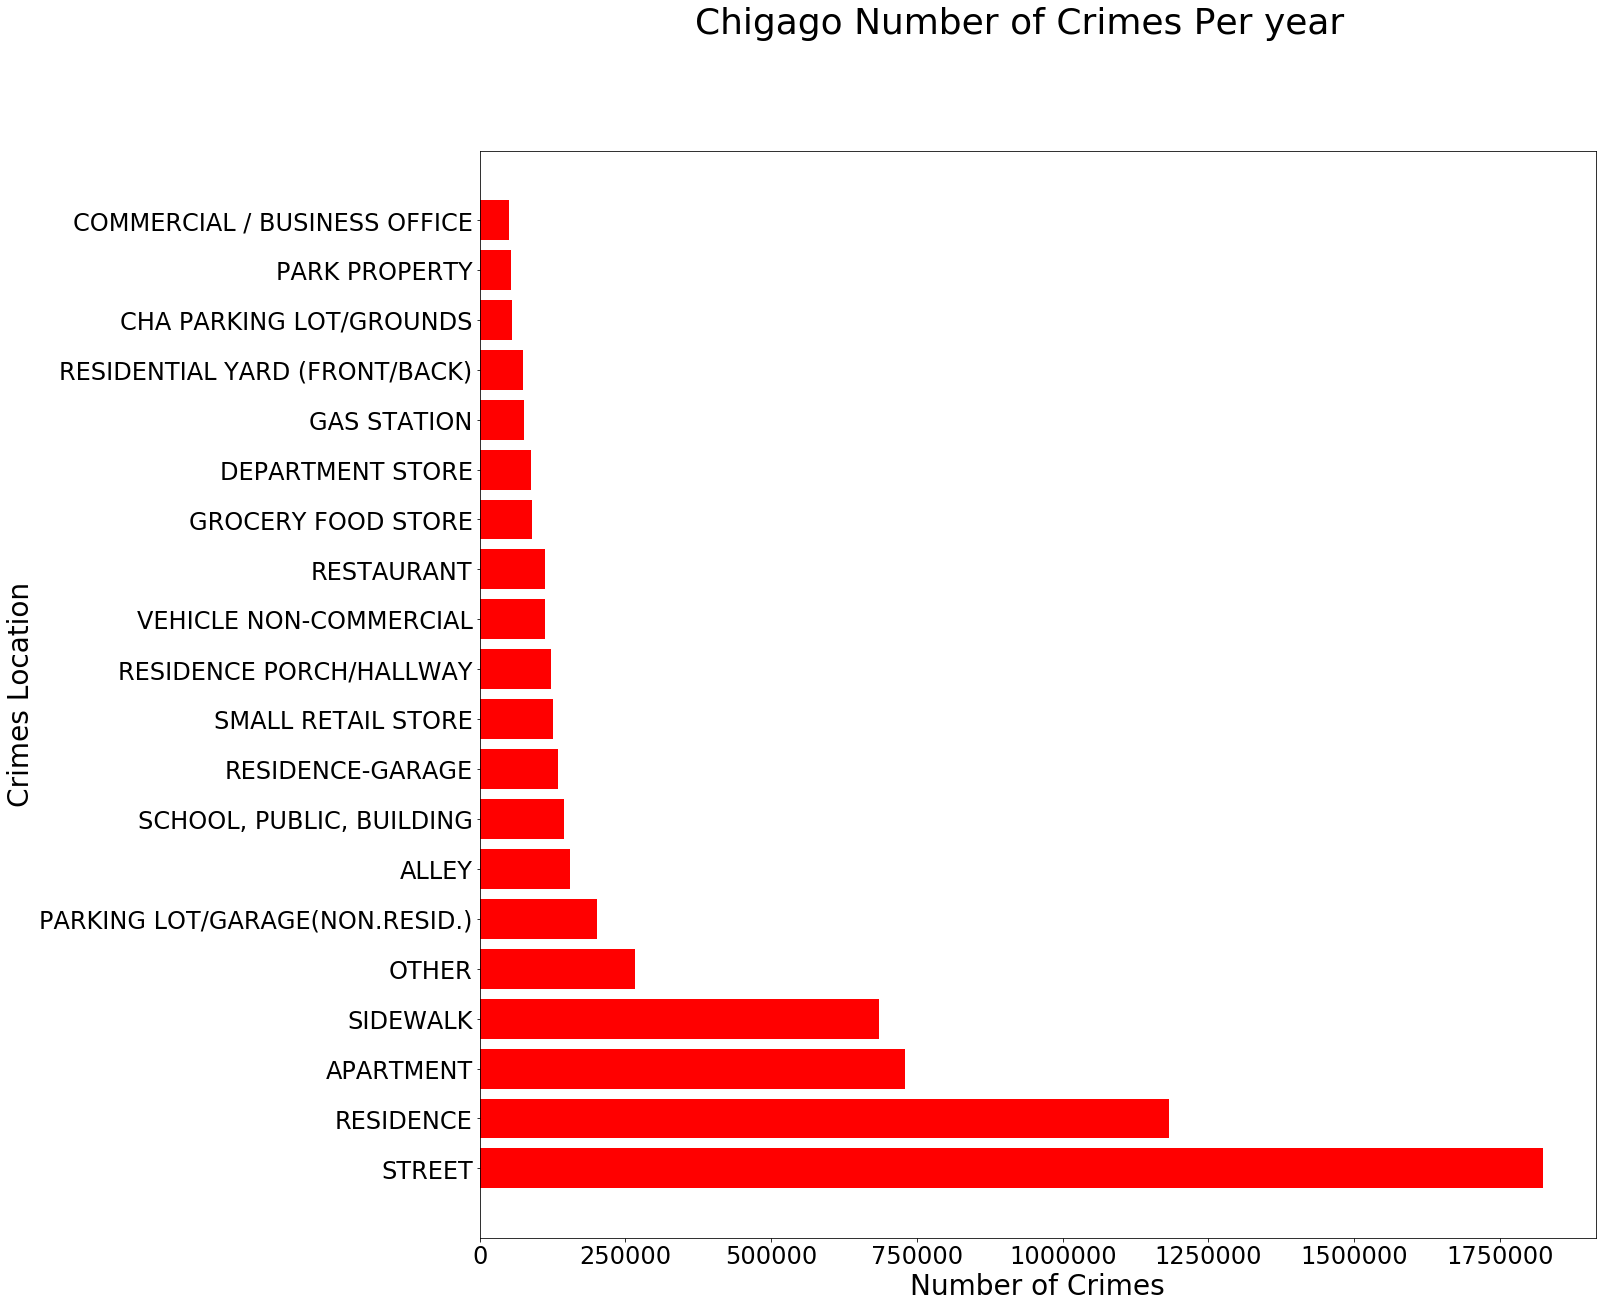

In [28]:
x_axis = [i for i in location] 
y_axis= [i for i in count]

fig = plt.figure(figsize=(20,20))
fig.suptitle('Chigago Number of Crimes Per year', fontsize=36)
 
plt.xlabel("Number of Crimes", fontsize = 28)
plt.ylabel("Crimes Location", fontsize = 28)
plt.barh(x_axis,y_axis,color = "red")
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

In [60]:
crime_Coordinates  = bostoncrimes.groupBy("Lat","Long").count().sort('count', ascending  = False).limit(50).collect()
crime_Coordinates.pop(0)
map_location = [[item[0],item[1],item[2]] for item in crime_Coordinates]
long_lat=[[item[0],item[1]] for item in map_location]       
long_lat.pop(0)
count=[item[2] for item in map_location]
map_location

[['42.34862382', '-71.08277637', 1671],
 ['42.36183857', '-71.05976489', 1651],
 ['768218.0809', '2945064.255', 1506],
 ['42.28482577', '-71.09137369', 1463],
 ['42.32866284', '-71.08563401', 1337],
 ['42.25621592', '-71.12401947', 1239],
 ['42.29755533', '-71.0597091', 1153],
 ['42.34128751', '-71.05467933', 1011],
 ['774104.1328', '2943918.604', 1008],
 ['42.33152148', '-71.07085307', 995],
 ['-1', '-1', 928],
 ['42.33511904', '-71.0749171', 902],
 ['42.32696647', '-71.06198607', 888],
 ['42.33210843', '-71.07014395', 872],
 ['42.30971857', '-71.10429432', 864],
 ['42.32696802', '-71.08051941', 851],
 ['42.3523119', '-71.0637051', 851],
 ['766751.5911', '2929095.955', 843],
 ['42.33954199', '-71.06940877', 841],
 ['42.35512339', '-71.0608798', 803],
 ['42.33401829', '-71.07638124', 766],
 ['776551.5679', '2949714.607', 735],
 ['42.34285014', '-71.06516235', 716],
 ['774845.858', '2938432.619', 714],
 ['42.33428841', '-71.07239518', 713],
 ['769006.8448', '2952355.38', 699],
 ['42.310

In [61]:
_long_lat  = chicagocrimes.groupBy("Latitude","Longitude").count().sort('count', ascending  = False).limit(50).collect()
_long_lat.pop(0)
_location = [[item[0],item[1],item[2]] for item in _long_lat]
coordinates=[[item[0],item[1]] for item in _location]       
coordinates.pop(0)
count=[item[2] for item in _location]
_location

[[41.976290414, -87.905227221, 13380],
 [41.754592961, -87.741528537, 9650],
 [41.883500187, -87.627876698, 7400],
 [41.897895128, -87.624096605, 4549],
 [41.896888586, -87.628203192, 3253],
 [41.909664252, -87.742728815, 3188],
 [41.885487535, -87.726422045, 2810],
 [41.788987036, -87.74147999, 2561],
 [41.904192368, -87.647000785, 2545],
 [41.88233367, -87.627841791, 2534],
 [41.736259984, -87.628068782, 2465],
 [41.721627204, -87.624485177, 2424],
 [41.737094305, -87.572998178, 2356],
 [41.68995741, -87.637460623, 2275],
 [41.891990384, -87.611461502, 2266],
 [41.979006297, -87.906463155, 2262],
 [41.739265865, -87.604893749, 2202],
 [41.868180939, -87.709271389, 2199],
 [41.736148121, -87.629070243, 2122],
 [41.868541914, -87.639235361, 2116],
 [42.019399237, -87.675049485, 2064],
 [41.706070186, -87.653645803, 2031],
 [41.882394062, -87.627844798, 2021],
 [41.899410159, -87.624131266, 2004],
 [41.750940757, -87.625185222, 1997],
 [41.814007401, -87.628331665, 1957],
 [41.929743818

In [63]:
import folium
from folium.plugins import HeatMap
first_map = folium.Map(location=[42.355300, -71.055280], zoom_start=5)
test = HeatMap(crime_Coordinates,name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, blur=10, gradient=None, overlay=True, control=True, show=True).add_to(first_map)
test1 = HeatMap(_long_lat,name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, blur=10, gradient=None, overlay=True, control=True, show=True).add_to(first_map)
first_map

In [46]:
from datetime import datetime
from pyspark.sql.functions import col,udf
myfunc =  udf(lambda x: datetime.strptime(x, '%Y %I'), TimestampType())

In [47]:
db =bostonIncome.withColumn('Date_time',myfunc(col('Year')))
dc =chicagoIncome.withColumn('Date_time',myfunc(col('Year')))
ddb =bostonIncome.withColumn('',myfunc(col('Year')))
db

DataFrame[ID Year: string, Year: string, Income: int, Household Income by Race Moe: string, Geography: string, ID Geography: string, Slug: string, Date_time: timestamp]

In [48]:
boston_income_data =db.groupBy('Year').sum("Income").sort('Year').collect()
boston_income_count = [item[1] for item in boston_income_data]
boston_incoem_year = [item[0] for item in boston_income_data]
boston_income_data

[Row(Year='2013', sum(Income)=300255),
 Row(Year='2014', sum(Income)=309971),
 Row(Year='2015', sum(Income)=320237),
 Row(Year='2016', sum(Income)=340711),
 Row(Year='2017', sum(Income)=356629)]

In [49]:
chicago_income_data =dc.groupBy('Year').sum('Income').sort('Year').collect()
chicago_income_count = [item[1] for item in chicago_income_data]
chicago_income_year = [item[0] for item in chicago_income_data]
chicago_income_data

[Row(Year='2013', sum(Income)=346145),
 Row(Year='2014', sum(Income)=356517),
 Row(Year='2015', sum(Income)=367628),
 Row(Year='2016', sum(Income)=382557),
 Row(Year='2017', sum(Income)=397952)]

In [50]:
chicago_income_count

[346145, 356517, 367628, 382557, 397952]

In [51]:
chicagoIncome.columns


['ID Year',
 'Year',
 'Income',
 'Household Income by Race Moe',
 'Geography',
 'ID Geography',
 'Slug']

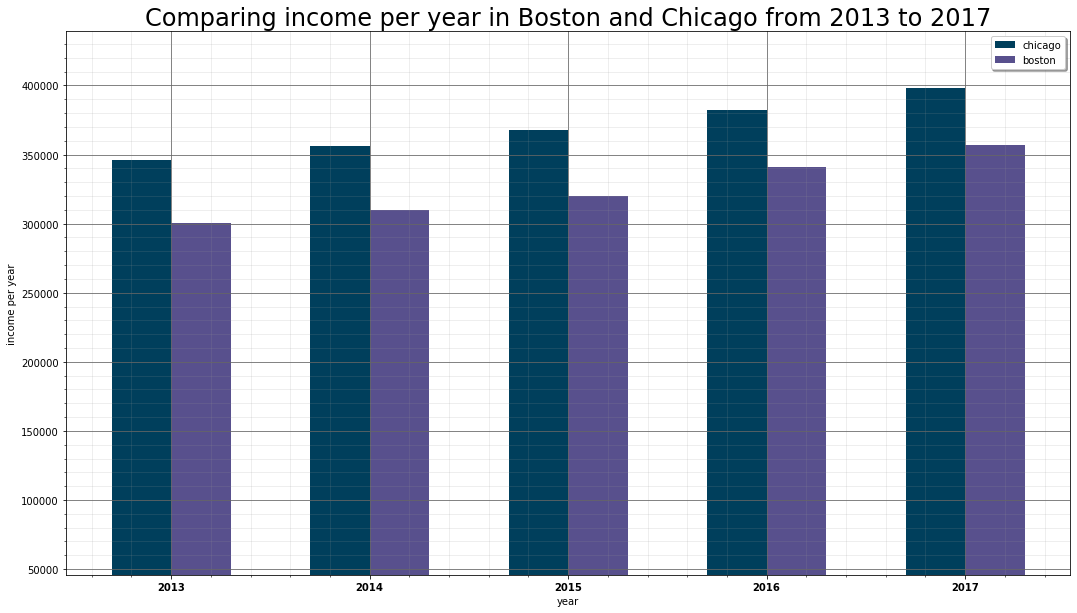

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y_axis = [i for i in boston_income_count] 
x_axis= [i for i in chicago_income_count]
chicago_income_count[0] - boston_income_count[0]
data = [x_axis,y_axis]

fig = plt.figure(figsize=(18,10))
plt.title('Comparing income per year in Boston and Chicago from 2013 to 2017', fontsize=24)

#bars = np.add(x_axis, y_axis).tolist()



 
# Names of group and bar width
names = ['2013','2014','2015','2016','2017']
#barWidth = 0.25
X = np.arange(len(names))
plt.bar(X - 0.15, data[0], color = '#003f5c', width = 0.3,label='chicago')
plt.bar(X + 0.15, data[1], color = '#58508d', width = 0.3,label='boston')
# Create green bars (top)
#plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
ax = plt.gca()
ax.set_ylim(min(data[0]) - min(data[1]), max(data[0]) + (max(data[0]) - max(data[1])))
ax.legend(shadow=True)
    
# Custom X axis
plt.xticks(X, names, fontweight='bold')
plt.xlabel("year")
plt.ylabel("income per year")

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


# Show graphic
plt.show()